# NASA's EONET API and Google Maps Data Visualization: A Tutorial

Retrieving data from the web can be a daunting task. Oftentimes, data is protected and secured by organizations which might make it difficult to retrieve the data that you want. More commonly, organizations will create APIs, which are essentially web roadmaps to access data that they have available. Navigating the API world, however, can be confusing. In this tutorial, I will access data using NASA's EONET API and methods of visualizing the data using a Google Maps API. EONET (Earth Observatory Natural Event Tracker) is a repository of metadata about natural events distributed by NASA. Using the EONET API, I have accessed the locations, recorded over time, of three different icebergs along the coast of Antarctica. The final product will be a satellite map of Antarctica with different colored points for each iceberg. Much of this tutorial will include cleaning the data after retrieving it with the API.

In [42]:
#the following are needed modules for this analysis
import pandas as pd 
import numpy as np 
#modules for plotting data:
import seaborn as sns
import matplotlib.pyplot as plt
#module for requesting data from the API and displaying the JSON data after completing the API request
import requests 
import json 
#modules for Google Maps data visualization
import gmaps
from gmplot import gmplot

## API Access:

Every API has specific documentation, and this is no different for EONET. The link to the documentation for this API can be accessed at the following url: https://eonet.sci.gsfc.nasa.gov/docs/v2.1. One of the EONET sources of data was a BYU database of tracked iceberg locations. Most APIs return data in a JSON (JavaScript Object Notation) format. A common data structure is that of nested dictionaries, which can be parsed through with relatively little effort using Python.

In [2]:
#The following line of code accesses the EONET API and the desired data:
ice = requests.get("https://eonet.sci.gsfc.nasa.gov/api/v2.1/events?limit=5000&days=287&source=BYU_ICE&status=closed")

In [3]:
#load the JSON text file 
iceberg = json.loads(ice.text)
iceberg

{'title': 'EONET Events',
 'description': 'Natural events from EONET.',
 'link': 'https://eonet.sci.gsfc.nasa.gov/api/v2.1/events',
 'events': [{'id': 'EONET_2733',
   'title': 'Iceberg B30',
   'description': '',
   'link': 'https://eonet.sci.gsfc.nasa.gov/api/v2.1/events/EONET_2733',
   'closed': '2019-06-21T00:00:00Z',
   'categories': [{'id': 15, 'title': 'Sea and Lake Ice'}],
   'sources': [{'id': 'BYU_ICE',
     'url': 'http://www.scp.byu.edu/data/iceberg/ascat/b30.ascat'},
    {'id': 'NATICE',
     'url': 'http://www.natice.noaa.gov/pub/icebergs/Iceberg_Tabular.csv'}],
   'geometries': [{'date': '2012-05-24T00:00:00Z',
     'type': 'Point',
     'coordinates': [-107.3557, -74.7689]},
    {'date': '2012-10-13T00:00:00Z',
     'type': 'Point',
     'coordinates': [-106.7162, -74.3355]},
    {'date': '2012-11-12T00:00:00Z',
     'type': 'Point',
     'coordinates': [-107.0365, -73.8453]},
    {'date': '2012-11-27T00:00:00Z',
     'type': 'Point',
     'coordinates': [-108.0672, -73

## Data Cleaning and Aggregation:

After retrieving the JSON-formatted data, we can clean and organize the data into a more useful format. Because I am not concerned with any statistical analysis for this tutorial, I am just interested in parsing the location coordinates of each of the icebergs from the raw data rather than feature-engineering. 

The following cells show my process of data cleaning and aggregation. Because I only accessed the locations of three icebergs, it wasn't difficult to individually parse the coordinates. However, for larger datasets it may be necessary to loop through many objects. This is the more realistic case of API access and data cleaning. 

In [10]:
iceberg = json.loads(ice.text)
iceberg_ids = []
for n in range(0,len(iceberg['events'])):
    iceberg_ids.append(iceberg['events'][n]['title']) #parse the iceberg id numbers/names
iceberg_ids #there are 3 icebergs tracked in this database

['Iceberg B30', 'Iceberg B09F', 'Iceberg B15T']

In [11]:
len1 = len(iceberg['events'][0]['geometries'])
len2 = len(iceberg['events'][1]['geometries'])
len3 = len(iceberg['events'][2]['geometries'])

In [12]:
#get coordinates for each iceberg
i1 = []
i2 = []
i3 = []
for n in range(0,len1):
    i1.append(iceberg['events'][0]['geometries'][n]['coordinates'])
for n in range(0,len2):
    i2.append(iceberg['events'][1]['geometries'][n]['coordinates'])
for n in range(0,len3):
    i3.append(iceberg['events'][2]['geometries'][n]['coordinates']) 


In [13]:
#get dates of measurement for each iceberg
d1 = []
d2 = []
d3 = []
for n in range(0,len1):
    d1.append(iceberg['events'][0]['geometries'][n]['date'])
for n in range(0,len2):
    d2.append(iceberg['events'][1]['geometries'][n]['date'])
for n in range(0,len3):
    d3.append(iceberg['events'][2]['geometries'][n]['date']) 

In [41]:
#for reference, get the (unique) years of the measurements for each iceberg
years1 = []
for i in range(0,len(d1)):
    years1.append(d1[i][0:4])
year1 = pd.DataFrame(years1).iloc[:,0].unique()

years2 = []
for i in range(0,len(d2)):
    years2.append(d2[i][0:4])
year2 = pd.DataFrame(years2).iloc[:,0].unique()
year2

years3 = []
for i in range(0,len(d3)):
    years3.append(d3[i][0:4])
year3 = pd.DataFrame(years3).iloc[:,0].unique()

y1 = pd.DataFrame(year1)
y2 = pd.DataFrame(year2)
y3 = pd.DataFrame(year3)
uniq_yrs = pd.concat([y1,y2,y3],axis=1)
uniq_yrs = uniq_yrs.rename(columns={0: "Years for B30 Measures", 1: "Years for B09F Measures",2:"Years for B15T Measures"})
uniq_yrs.head()

,Years for B30 Measures,Years for B30 Measures,Years for B30 Measures
0,2012,2012,2011
1,2013,2013,2014
2,2014,2014,2015
3,2015,2015,2016
4,2016,2016,2017


In [17]:
#parse out the latitude and longitude values from coordinate pairs for each of the three icebergs
i1_lat = []
i1_long = []
for i in range(0,len(i1)):
    i1_lat.append(i1[i][0])
    i1_long.append(i1[i][1])

i2_lat = []
i2_long = []
for i in range(0,len(i2)):
        i2_lat.append(i2[i][0])
        i2_long.append(i2[i][1])

i3_lat = []
i3_long = []
for i in range(0,len(i3)):
    i3_lat.append(i2[i][0])
    i3_long.append(i2[i][1])

coordinates = [i1_lat,i1_long,i2_lat,i2_long,i3_lat,i3_long]
latitudes = [i1_lat,i2_lat,i3_lat]
longitudes = [i1_long,i2_long,i3_long]


lats = [y for x in latitudes for y in x] 
longs = [y for x in longitudes for y in x]

coords = [lats,longs]
iceberg_paths = pd.DataFrame(coords).transpose()

In [18]:
name_1 = ["B30"] * len(i1_lat)
name_2 = ["B09F"] * len(i2_lat)
name_3 = ["B15T"] * len(i3_lat)
names = [name_1,name_2,name_3] 
Ice_Name = [y for x in names for y in x]
iceberg_paths['Iceberg_id'] = Ice_Name #create a new variable with the names of each of the icebergs

Below is the final dataframe, after cleaning and parsing the data, that I will use to plot the paths of these icebergs.

In [20]:
#get a final dataframe with the latitude, longitude, and iceberg id
iceberg_paths = iceberg_paths.rename(columns={0: "lat", 1: "long"})
iceberg_paths.head()

,lat,long,Iceberg_id
0,-107.3557,-74.7689,B30
1,-106.7162,-74.3355,B30
2,-107.0365,-73.8453,B30
3,-108.0672,-73.5001,B30
4,-108.7895,-73.0702,B30


## Data Visualization: 

As a first attempt to visualize the paths of the icebergs, I plotted the paths on a scatterplot (x=latitude,y=longitude). The paths are clearly visible, with separate colors for separate icebergs.

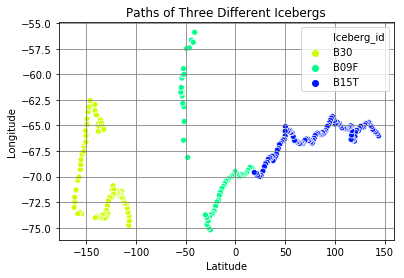

In [38]:
plot1 = sns.scatterplot(data=iceberg_paths,x="lat",y="long",hue='Iceberg_id',palette='gist_rainbow') 
plt.grid(color='gray') #set gridlines
plot1.set(xlabel='Latitude', 
       ylabel='Longitude',title='Paths of Three Different Icebergs')
s1 = plot1.get_figure()
#s1.savefig('Figs\part4_plot1.png') #if you want to save your figure to your local machine

I have plotted the paths of the icebergs on a scatterplot, as seen above, but it is hard to tell what the exact geographical locations are. Truth be told, when I first completed this code, I didn't know if the icebergs were nearer the Artic Circle or Antarctica. My solution was to plot the paths on a satellite map using a Google API, specifically the Maps API, which allows people to embed and display Google Maps inside their code. The first step to this process is creating your own personal API. It should be noted that this API key should not be published on the web or shared with anyone else. 

The process to create an API can be found at the following url: https://developers.google.com/maps/documentation/embed/get-api-key. Once you have created your API, you can add restrictions to the key which restricts the applications that are allowed to call your API key. 

In [24]:
gmaps.configure(api_key="YOUR API KEY HERE") #how to configure the gmaps module

In [25]:
#get the latitudes and longitudes for each iceberg into their own dataframes
ice1_lat = iceberg_paths.lat.loc[iceberg_paths['Iceberg_id'].isin(['B30'])]
ice1_long = iceberg_paths.long.loc[iceberg_paths['Iceberg_id'].isin(['B30'])]
ice2_lat = iceberg_paths.lat.loc[iceberg_paths['Iceberg_id'].isin(['B09F'])]
ice2_long = iceberg_paths.long.loc[iceberg_paths['Iceberg_id'].isin(['B09F'])]
ice3_lat = iceberg_paths.lat.loc[iceberg_paths['Iceberg_id'].isin(['B15T'])]
ice3_long = iceberg_paths.long.loc[iceberg_paths['Iceberg_id'].isin(['B15T'])]

In [33]:
#create dataframe for each iceberg
iceberg1 = pd.concat([ice1_lat,ice1_long],axis=1)
iceberg2 = pd.concat([ice2_lat,ice2_long],axis=1)
iceberg3 = pd.concat([ice3_lat,ice3_long],axis=1)
iceberg1.head()

,lat,long
0,-107.3557,-74.7689
1,-106.7162,-74.3355
2,-107.0365,-73.8453
3,-108.0672,-73.5001
4,-108.7895,-73.0702


Each dataframe (one for each of the three icebergs) should have a column of latitudes ("lat") and a column of longitudes ("long"). The process to map these paths on a satellite map requires you to first configure the map and provide a pair of centering coordinates that will center the map view at that location. You can also specify a zoom level at which the map will display when the code is run, and the zoom in or out using the "+" or "-" buttons on the map.

After configuring the map, which also requires specifying the type of map (options include SATELLITE, TERRAIN, ROADMAP, and others), you can add layers to the map. This is where you will add the paths of the icebergs. Each iceberg will have its own layer. Depending on how many layers you want to add, your code may be very simple or very complicated. The code can be seen below. 

You can specify a color for each path, the shape of the points (the default shape is a simple dot), as well as a text box that pops up each time you click on one of the symbols. The code below is commented, but a screenshot of the output is seen below. An info box can be added to each point/"symbol", with a user defined label. 

In [36]:
#plot the paths on a map
#center_coords = (-71,0.1) #center the base map so all three paths show up 
#fig = gmaps.figure(map_type="SATELLITE",center=center_coords, zoom_level=2)
#fig.add_layer(gmaps.symbol_layer(iceberg1[['long','lat']],fill_color='yellow',
#                                 stroke_color='yellow',info_box_content='Iceberg B30',display_info_box=True)) #B30
#fig.add_layer(gmaps.symbol_layer(iceberg2[['long','lat']],fill_color='red',
#                                 stroke_color='red',info_box_content='Iceberg B09F',display_info_box=True)) #B09F
#fig.add_layer(gmaps.symbol_layer(iceberg3[['long','lat']],fill_color='blue',
#                                 stroke_color='blue',info_box_content='Iceberg B15T',display_info_box=True)) #B15T
#fig

#click on each path for the iceberg name

![alt text](map.png)

Plotting location coordinates on geographical maps can be a useful and interactive method of data visualization. It can be fascinating to see the locations of natural phenomena mapped in relation to recognizable physical features, such as the ice sheets of Antarctica or the southern tip of South America. API's, while daunting at first, are incredibly versatile as they allow us widespread access to data, as well as useful functionalities such as Google Maps. 